In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv?_sm_au_=iVVb0jDn0PSH4HSMRMpVsKQtC6Vvq"

In [3]:
df = pd.read_csv(url)

In [4]:
df.drop(columns=['Lat', 'Long'], inplace=True)

In [5]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,2,1,2,2,4,4,7,7,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,0,1,3,3,4,5,7,7,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,0,0,0,3,4,4,4,7,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [6]:
countries = df["Country/Region"].unique()

In [7]:
countries.sort()

In [8]:
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia, The', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guadelo

# Switzerland

In [10]:
swiss = df[df["Country/Region"] == "Switzerland"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

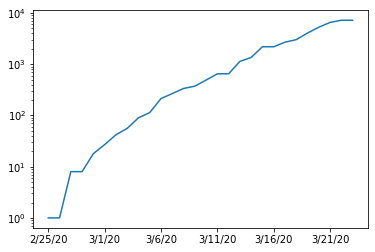

In [11]:
swiss[swiss!=0].plot(logy=True)

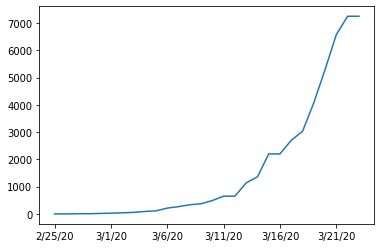

In [12]:
swiss[swiss!=0].plot()

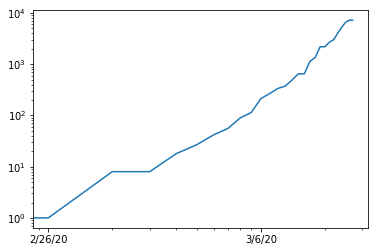

In [13]:
swiss[swiss!=0].plot(logy=True, logx=True)

# Europe

In [14]:
italy = df[df["Country/Region"] == "Italy"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [15]:
france = df[(df["Country/Region"] == "France") & (df["Province/State"] == "France")].drop(columns=["Country/Region", "Province/State"]).stack().droplevel(level=0)

In [16]:
uk = df[(df["Country/Region"] == "United Kingdom") & (df["Province/State"] == "United Kingdom")].drop(columns=["Country/Region", "Province/State"]).stack().droplevel(level=0)

In [17]:
# france.drop(columns=["Country/Region"], inplace=True)

In [18]:
# france = france.stack().droplevel(level=0)

In [19]:
spain = df[df["Country/Region"] == "Spain"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [20]:
germany =  df[df["Country/Region"] == "Germany"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [21]:
austria =  df[df["Country/Region"] == "Austria"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

In [22]:
europe = pd.concat([swiss, italy, france, germany, austria, spain, uk], axis=1)

In [23]:
europe.columns = ['Switzerland', 'Italy', 'France', 'Germany', 'Austria', 'Spain', 'UK']

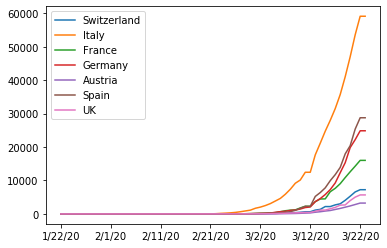

In [24]:
europe.plot()

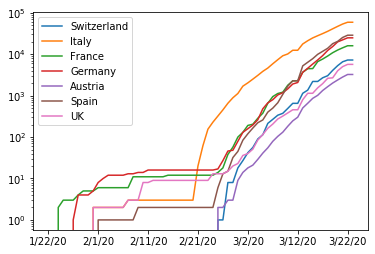

In [25]:
europe.plot(logy=True)

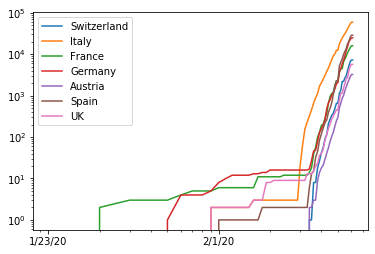

In [26]:
europe.plot(logy=True, logx=True)

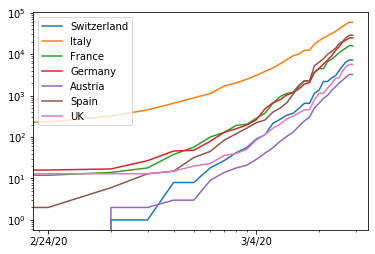

In [27]:
europe[32:].plot(logy=True, logx=True)

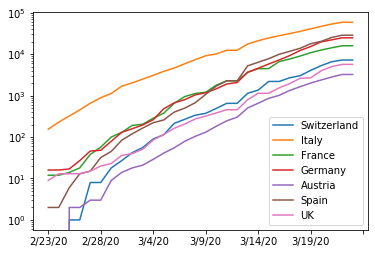

In [28]:
europe[32:].plot(logy=True)

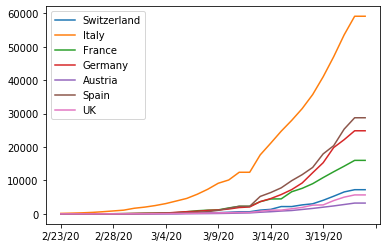

In [29]:
europe[32:].plot()

# USA

In [30]:
us = df[df["Country/Region"] == "US"].groupby(by=["Country/Region",]).sum().stack().droplevel(level=0)

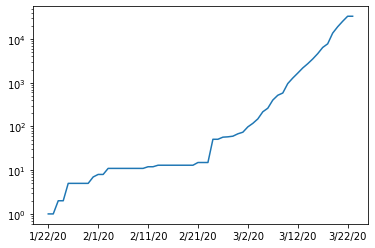

In [31]:
us[us!=0].plot(logy=True)

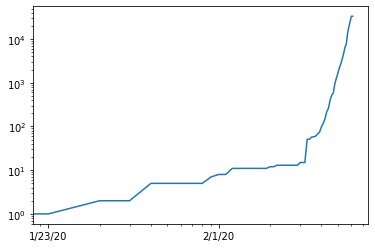

In [32]:
us[us!=0].plot(logy=True, logx=True)

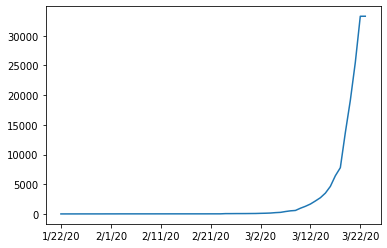

In [33]:
us[us!=0].plot()

In [34]:
df3 = pd.concat([europe, us], axis=1)

# Europe + USA

In [35]:
col = list(df3.columns)

In [36]:
col[col.index(0)] = 'USA'

In [37]:
df3.columns = col

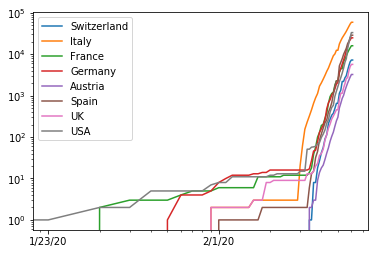

In [38]:
df3.plot(logy=True, logx=True)

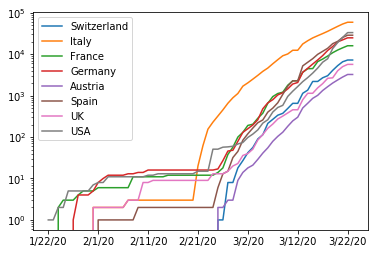

In [39]:
df3.plot(logy=True)

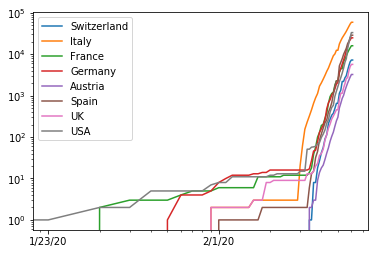

In [40]:
df3.plot(logy=True, logx=True)

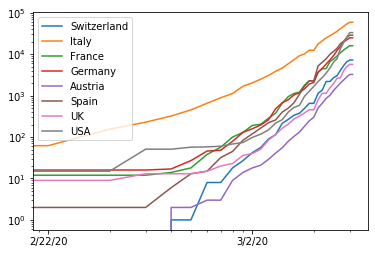

In [41]:
df3[30:].plot(logy=True, logx=True)

# Worldwide

In [42]:
df4 = df.sum(axis=0)

In [43]:
df4.drop(index=['Country/Region'], inplace=True)

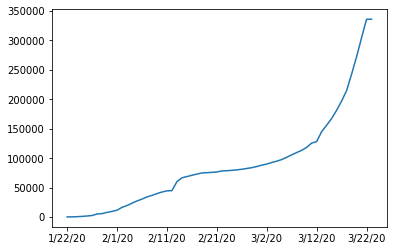

In [44]:
df4.plot()

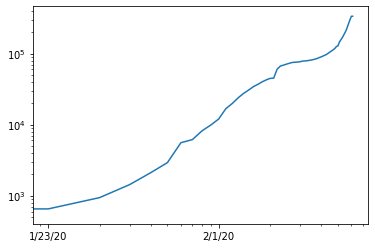

In [45]:
df4.plot(logy=True, logx=True)

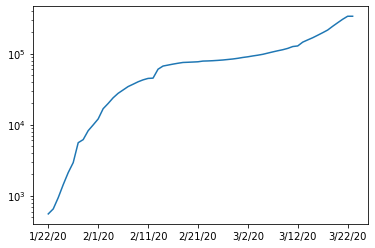

In [46]:
df4.plot(logy=True)

# Iran

In [47]:
iran = df[df["Country/Region"] == "Iran"].drop(columns=["Country/Region"]).stack().droplevel(level=0)

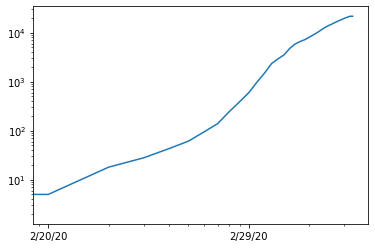

In [48]:
iran[iran!=0].plot(logy=True, logx=True)

In [49]:
df5 = pd.concat([europe, iran], axis=1)

In [50]:
df5.columns = ['Switzerland', 'Italy', 'France', 'Germany', 'Austria', 'Spain', 'UK', 'Iran']

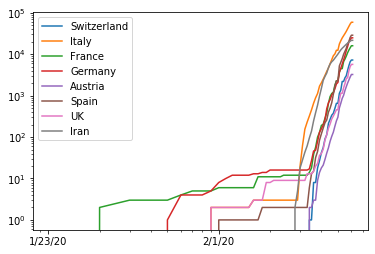

In [51]:
df5.plot(logy=True, logx=True)

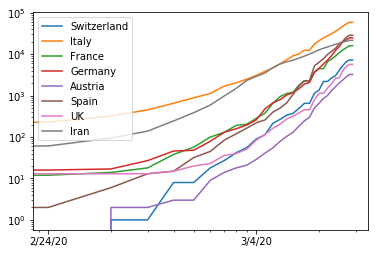

In [52]:
df5[32:].plot(logy=True, logx=True)

# China

In [53]:
china = df[df["Country/Region"] == "China"].groupby(by=["Country/Region",]).sum().stack().droplevel(level=0)

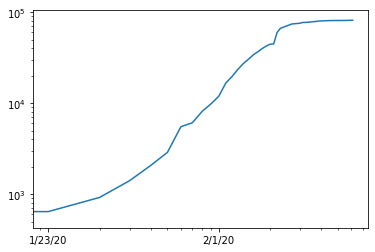

In [54]:
china.plot(logy=True, logx=True)

In [55]:
df6 = pd.concat([china, italy], axis=1)

In [56]:
df6.columns = ['China', 'Italy']

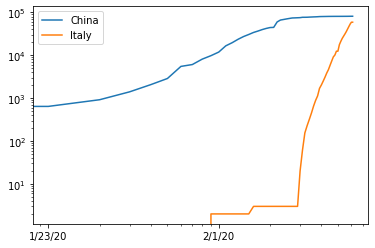

In [57]:
df6.plot(logy=True, logx=True)

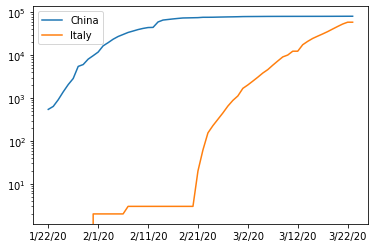

In [58]:
df6.plot(logy=True)